## Model Building - YOLOv6-N (Nano) Model

In [1]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [2]:
from ultralytics import YOLO

In [2]:
dataset_path = 'C:\\Users\\User\\OneDrive - Asia Pacific University\\APU\\Year 3\\FYP\\Dataset\\AccidentsDetection_rbfdataset\\data.yaml'

In [9]:
project='v6n_model_building'

## 1. Load Pretrained Model 

In [4]:
model_v6n = YOLO('yolov6n.yaml')

activation: nn.ReLU()

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  2     18560  ultralytics.nn.modules.conv.Conv             [32, 32, 3, 1]                
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  4    147968  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 1]                
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               


  6                  -1  6    886272  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 1]              
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  8                  -1  2   1180672  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 1]              
  9                  -1  1    164608  ultralytics.nn.modules.block.SPPF            [256, 256, 5]                 
 10                  -1  1     16512  ultralytics.nn.modules.conv.Conv             [256, 64, 1, 1]               
 11                  -1  1     16448  torch.nn.modules.conv.ConvTranspose2d        [64, 64, 2, 2, 0]             
 12             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 13                  -1  1    110720  ultralytics.nn.modules.conv.Conv             [192, 64, 3, 1]               
 14                  -1  3    110976  ultralytics.nn.modules.conv.Conv             [64, 

## 2. Transfer Learning

In [5]:
result_train1 = model_v6n.train(data=dataset_path,
                                 epochs=150, # default 100
                                 imgsz=640, # default
                                 patience=15, # default 100 (provide 15 epochs checking for early stopping)
                                 batch=16, # default
                                 optimizer='auto', # default
                                 lr0=0.01, # default 
                                 lrf=0.01, # default
                                 device=0, # GPU training
                                 project=project)

New https://pypi.org/project/ultralytics/8.1.47 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.186  Python-3.10.14 torch-2.2.2 CUDA:0 (NVIDIA GeForce RTX 2070, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolov6n.yaml, data=C:\Users\User\OneDrive - Asia Pacific University\APU\Year 3\FYP\Dataset\AccidentsDetection_rbfdataset\data.yaml, epochs=150, patience=15, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=v6n_model_building, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

Freezing layer 'model.28.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed 
train: Scanning C:\Users\User\OneDrive - Asia Pacific University\APU\Year 3\FYP\Dataset\AccidentsDetection_rbfdataset\train\labels.cache... 4878 images, 217 backgrounds, 0 corrupt: 100%|██████████| 4878/4878 [00:00<?, ?it/s]
val: Scanning C:\Users\User\OneDrive - Asia Pacific University\APU\Year 3\FYP\Dataset\AccidentsDetection_rbfdataset\valid\labels.cache... 607 images, 0 backgrounds, 0 corrupt: 100%|██████████| 607/607 [00:00<?, ?it/s]
Plotting labels to v6n_model_building\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 53 weight(decay=0.0), 62 weight(decay=0.0005), 61 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to v6n_model_buildi

wandb: Network error resolved after 0:00:20.759616, resuming normal operation.


## 3. Model Performance Evalaution

In [4]:
yolov6_baseline_result_path = 'C:\\Users\\User\\OneDrive - Asia Pacific University\\APU\\Year 3\\FYP\\FYP_notebooks\\Model_Training\\yolov6n_model\\v6n_model_building\\train'

In [46]:
# Count Total Epochs ran on the first training

yolov6_baseline_result_csv = yolov6_baseline_result_path + '\\results.csv'

# Open the CSV file
with open(yolov6_baseline_result_csv, 'r') as file:
    # Skip the first line
    next(file)

    line_count = sum(1 for line in file)

# 1 line = 1 epochs in the csv file (early stopping at epoch 102 out of 150 training epoch)
print(f"Early stopping at {line_count}/150 epochs")

Early stopping at 119/150 epochs


### 3.1 Learning Curves Analysis

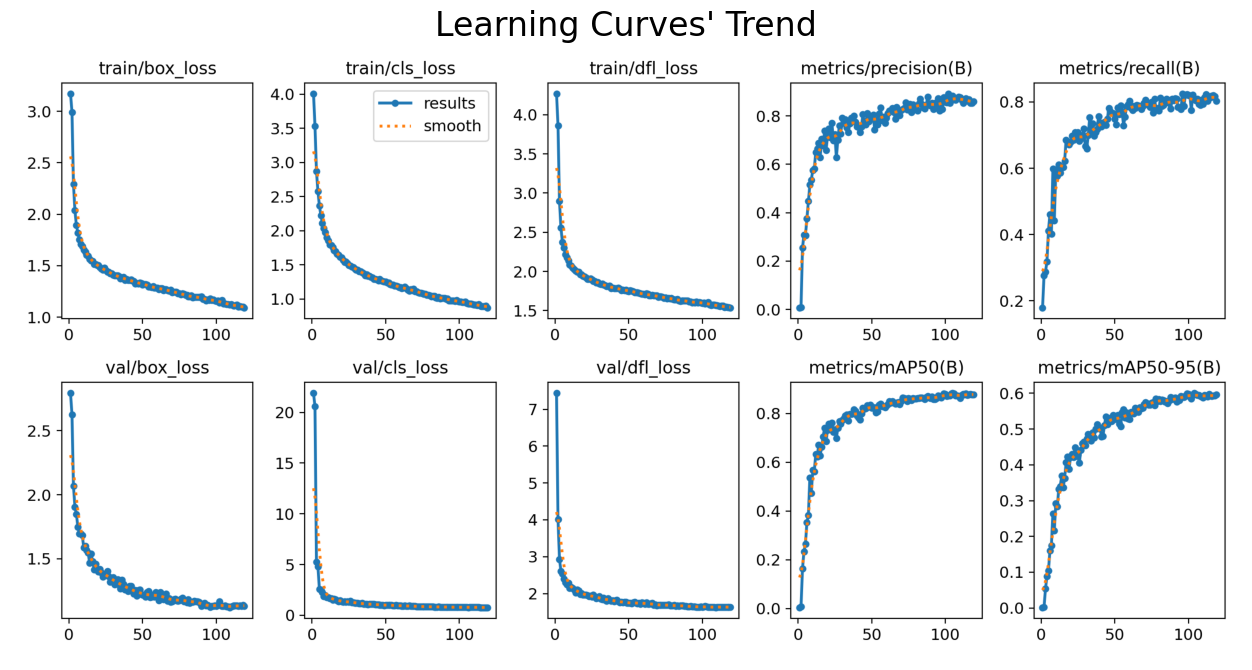

In [5]:
results_png_path = yolov6_baseline_result_path + '\\results.png'

# Read the image using cv2
image = cv2.imread(results_png_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

# Display the image using matplotlib
plt.figure(figsize=(20, 8))
plt.imshow(image)
plt.title("Learning Curves' Trend", fontsize=24)
plt.axis('off') 
plt.show()

In [19]:
# Define a function to plot learning curves for loss values
def plot_learning_curve(df, train_loss_col, val_loss_col, title, ylim_range=[0,2]):
    plt.figure(figsize=(12, 4))
    sns.lineplot(data=df, x='epoch', y=train_loss_col, label='Train Loss', color='blue', linestyle='-', linewidth=2)
    sns.lineplot(data=df, x='epoch', y=val_loss_col, label='Validation Loss', color='#ed2f00', linestyle='--', linewidth=2)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(ylim_range)
    plt.legend()
    plt.show()

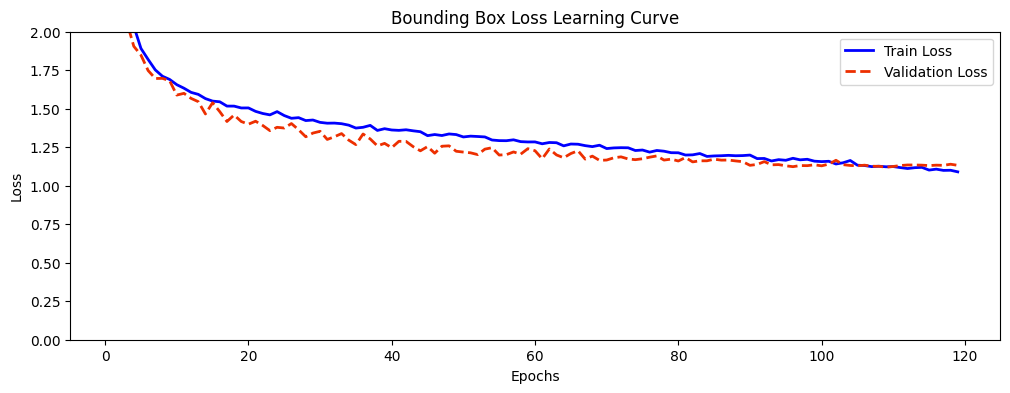

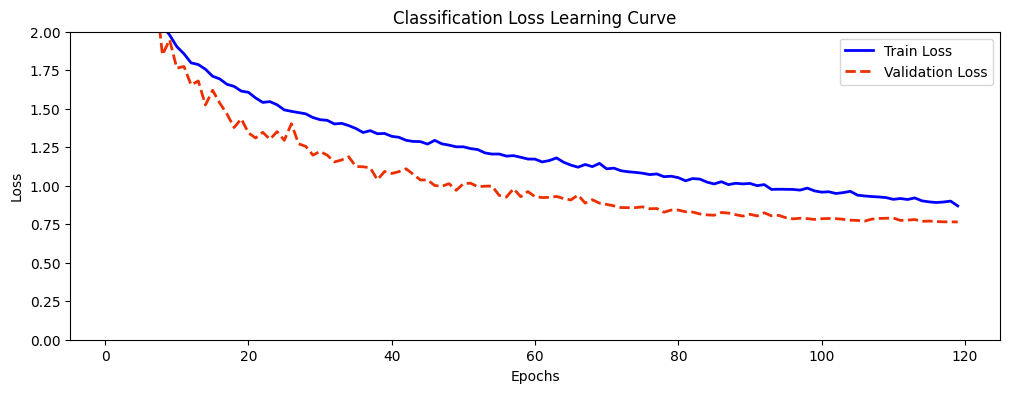

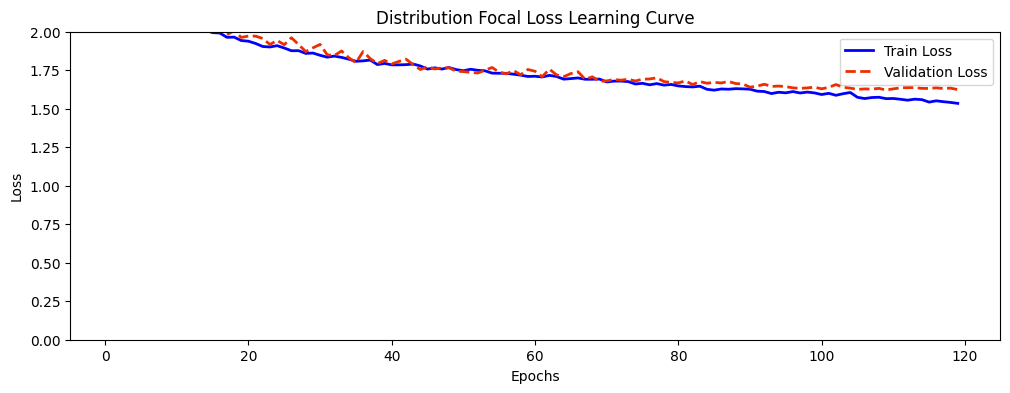

In [47]:
# Load the CSV file from the constructed path into a pandas DataFrame
df = pd.read_csv(yolov6_baseline_result_csv)

# Remove any leading whitespace from the column names
df.columns = df.columns.str.strip()

# Plot the learning curves for each loss
plot_learning_curve(df, 'train/box_loss', 'val/box_loss', 'Bounding Box Loss Learning Curve')
plot_learning_curve(df, 'train/cls_loss', 'val/cls_loss', 'Classification Loss Learning Curve')
plot_learning_curve(df, 'train/dfl_loss', 'val/dfl_loss', 'Distribution Focal Loss Learning Curve')

### 3.2 Confidence Threshold Analysis

In [15]:
confidence_metrics_paths = [
    f'{yolov6_baseline_result_path}\\P_curve.png',
    f'{yolov6_baseline_result_path}\\R_curve.png',
    f'{yolov6_baseline_result_path}\\F1_curve.png'
]

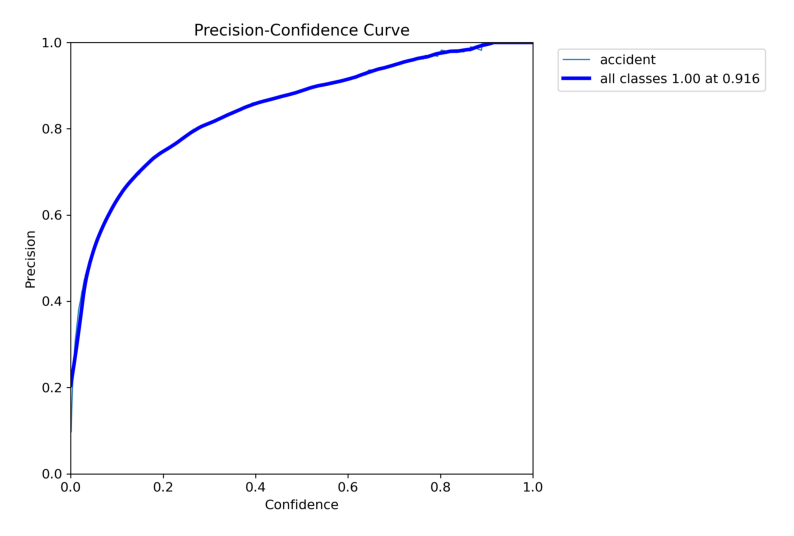

In [16]:
plt.figure(figsize=(10, 10))  # Adjust figsize as needed
img = plt.imread(confidence_metrics_paths[0])
plt.imshow(img)
plt.axis('off')
plt.show()

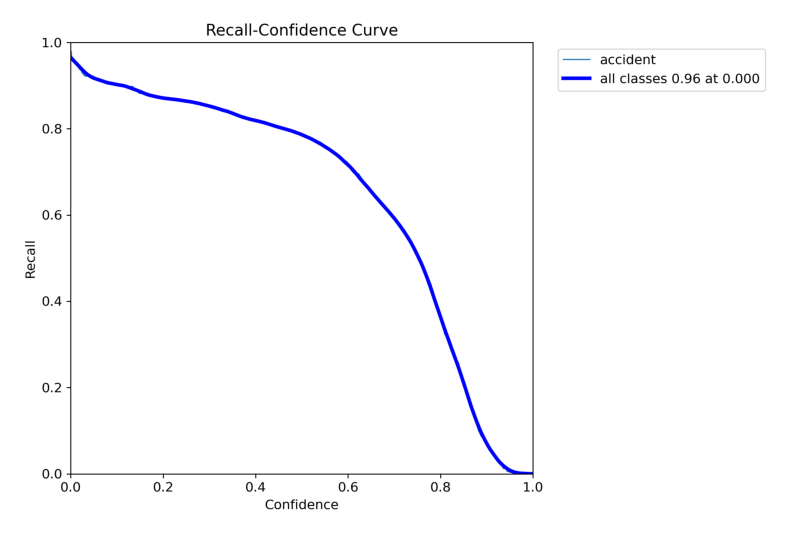

In [17]:
plt.figure(figsize=(10, 10))  # Adjust figsize as needed
img = plt.imread(confidence_metrics_paths[1])
plt.imshow(img)
plt.axis('off')
plt.show()

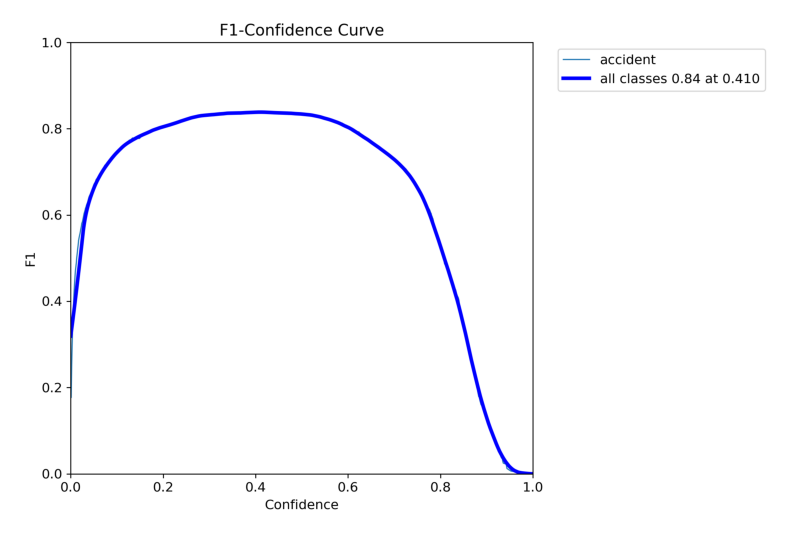

In [18]:
plt.figure(figsize=(10, 10))  # Adjust figsize as needed
img = plt.imread(confidence_metrics_paths[2])
plt.imshow(img)
plt.axis('off')
plt.show()

### 3.3 Precision-Recall Curve Analysis

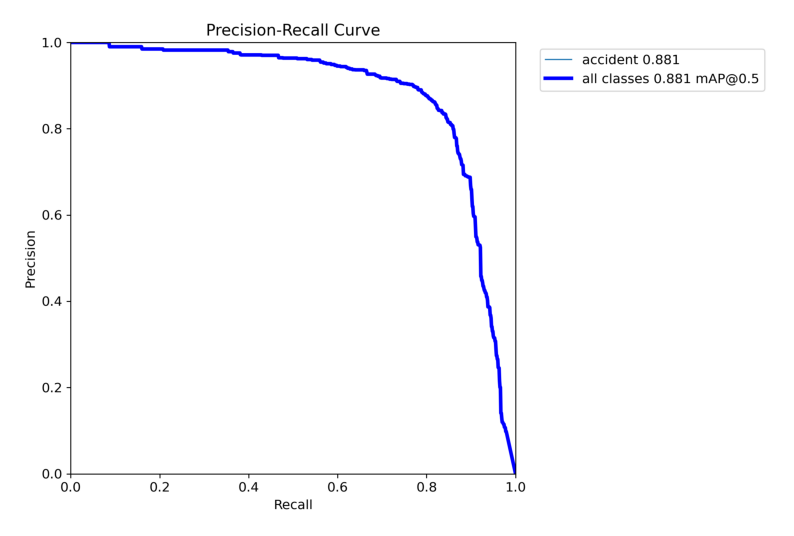

In [20]:
PR_Curve_img = f'{yolov6_baseline_result_path}\\PR_curve.png'

plt.figure(figsize=(10, 10))  # Adjust figsize as needed
img = plt.imread(PR_Curve_img)
plt.imshow(img)
plt.axis('off')
plt.show()

### 3.4 Confusion Matrix Analysis

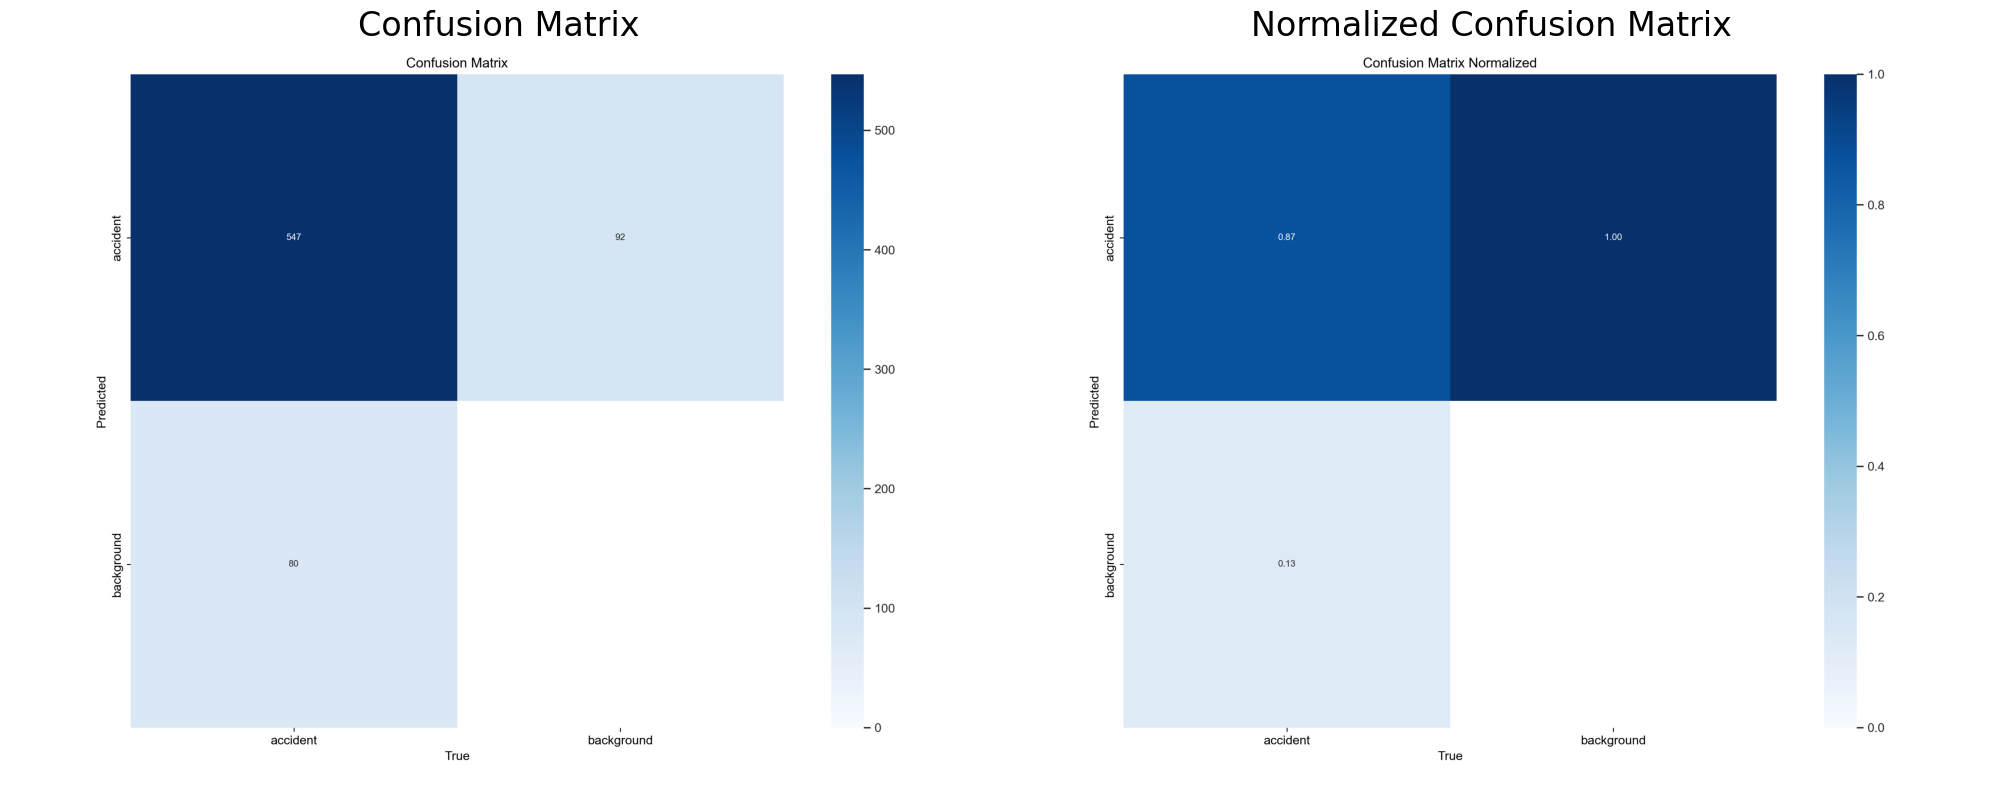

In [22]:
cf_matrix_nml_img = f'{yolov6_baseline_result_path}\\confusion_matrix_normalized.png'
cf_matrix_img = f'{yolov6_baseline_result_path}\\confusion_matrix.png'

# Read the images
cf_matrix_img_data = mpimg.imread(cf_matrix_img)
cf_matrix_nml_img_data = mpimg.imread(cf_matrix_nml_img)

# Create a 1x2 subplot
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Display the images
axs[0].imshow(cf_matrix_img_data)
axs[0].set_title('Confusion Matrix', fontsize=24)
axs[0].axis('off') 

axs[1].imshow(cf_matrix_nml_img_data)
axs[1].set_title('Normalized Confusion Matrix', fontsize=24)
axs[1].axis('off')

plt.tight_layout()
plt.show()

### 3.5 Validation Performance Metrics Assessment

In [7]:
yolov6_baseline_model_weight = f'{yolov6_baseline_result_path}\\weights\\best.pt'

yolov6_baseline_model_load = YOLO(yolov6_baseline_model_weight)

In [10]:
yolov6_baseline_val_result = yolov6_baseline_model_load.val(project=project,name='train1_val')

Ultralytics YOLOv8.2.2  Python-3.10.14 torch-2.2.2 CUDA:0 (NVIDIA GeForce RTX 2070, 8192MiB)


YOLOv6n summary (fused): 142 layers, 4233843 parameters, 0 gradients, 11.8 GFLOPs


val: Scanning C:\Users\User\OneDrive - Asia Pacific University\APU\Year 3\FYP\Dataset\AccidentsDetection_rbfdataset\valid\labels.cache... 607 images, 0 backgrounds, 0 corrupt: 100%|██████████| 607/607 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.21it/s]


                   all        607        627      0.862      0.818      0.881        0.6
Speed: 0.5ms preprocess, 3.6ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to v6n_model_building\train1_val


In [34]:
# Convert the dictionary to a pandas DataFrame and use the keys as the index
yolov6_baseline_metrics_df = pd.DataFrame.from_dict(yolov6_baseline_val_result.results_dict, orient='index', columns=['Metric Value'])

# Display the DataFrame
print(yolov6_baseline_metrics_df.round(3))

                      Metric Value
metrics/precision(B)         0.862
metrics/recall(B)            0.818
metrics/mAP50(B)             0.881
metrics/mAP50-95(B)          0.600
fitness                      0.628


## 4. Model Improving

In [4]:
dataset2_path = 'C:\\Users\\User\\OneDrive - Asia Pacific University\APU\\Year 3\\FYP\Dataset\\car_accident_dataset.v1i.yolov8\\data.yaml'

In [5]:
yolov6_baseline_model_load.train(data=dataset2_path,
                        epochs=100, # default
                        imgsz=640, # default
                        patience=15, # default 100 (provide 15 epochs checking for early stopping)
                        batch=64, # default
                        optimizer='auto', # default
                        lr0=0.01, # default 
                        lrf=0.01, # default
                        dropout=0.1,
                        device=0, # GPU training
                        project='v6n_model_building',
                        name='train_ds2')

New https://pypi.org/project/ultralytics/8.1.47 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.186  Python-3.10.14 torch-2.2.2 CUDA:0 (NVIDIA GeForce RTX 2070, 8192MiB)
engine\trainer: task=detect, mode=train, model=C:\Users\User\OneDrive - Asia Pacific University\APU\Year 3\FYP\FYP_notebooks\Model_Training\yolov6n_model\v6n_model_building\train\weights\best.pt, data=C:\Users\User\OneDrive - Asia Pacific University\APU\Year 3\FYP\Dataset\car_accident_dataset.v1i.yolov8\data.yaml, epochs=100, patience=15, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=v6n_model_building, name=train_ds2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.1, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.

Freezing layer 'model.28.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed 
train: Scanning C:\Users\User\OneDrive - Asia Pacific University\APU\Year 3\FYP\Dataset\car_accident_dataset.v1i.yolov8\train\labels.cache... 7065 images, 4 backgrounds, 0 corrupt: 100%|██████████| 7065/7065 [00:00<?, ?it/s]
val: Scanning C:\Users\User\OneDrive - Asia Pacific University\APU\Year 3\FYP\Dataset\car_accident_dataset.v1i.yolov8\valid\labels.cache... 1072 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1072/1072 [00:00<?, ?it/s]
Plotting labels to v6n_model_building\train_ds2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 53 weight(decay=0.0), 62 weight(decay=0.0005), 61 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to v6n_m

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001E6034D45E0>
fitness: 0.9704275287454266
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.96809])
names: {0: 'accident'}
plot: True
results_dict: {'metrics/precision(B)': 0.995706410325645, 'metrics/recall(B)': 0.9803746654772525, 'metrics/mAP50(B)': 0.9914851627790237, 'metrics/mAP50-95(B)': 0.9680877916305825, 'fitness': 0.9704275287454266}
save_dir: WindowsPath('v6n_model_building/train_ds2')
speed: {'preprocess': 0.38139499835113977, 'inference': 1.931039922272981, 'loss': 0.001863312365403816, 'postprocess': 1.5737910324068212}

## 5. Improved Model Performance Evalaution

In [5]:
yolov6_improved_results_path = 'C:\\Users\\User\\OneDrive - Asia Pacific University\\APU\\Year 3\\FYP\\FYP_notebooks\\Model_Training\\yolov6n_model\\v6n_model_building\\train_ds2'
yolov6_improved_result_csv = yolov6_improved_results_path + '\\results.csv'

### 5.1 Learning Curves (Improved)

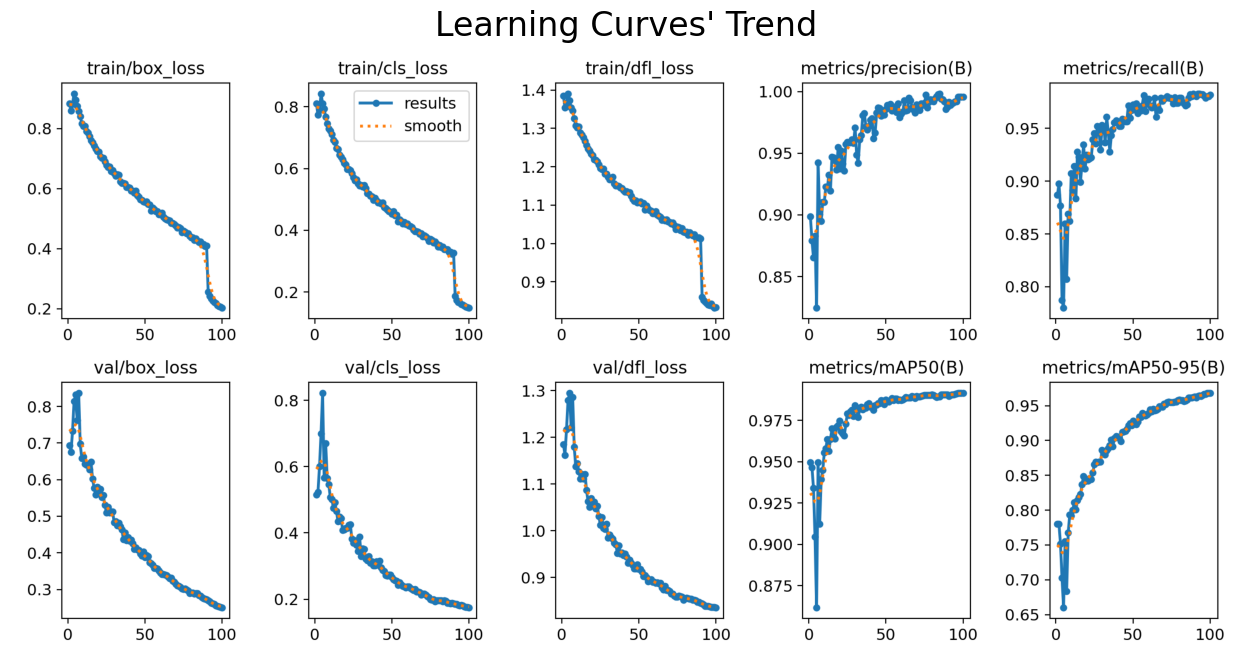

In [17]:
results_png_path2 = yolov6_improved_results_path + '\\results.png'

# Read the image using cv2
image = cv2.imread(results_png_path2)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

# Display the image using matplotlib
plt.figure(figsize=(20, 8))
plt.imshow(image)
plt.title("Learning Curves' Trend", fontsize=24)
plt.axis('off') 
plt.show()

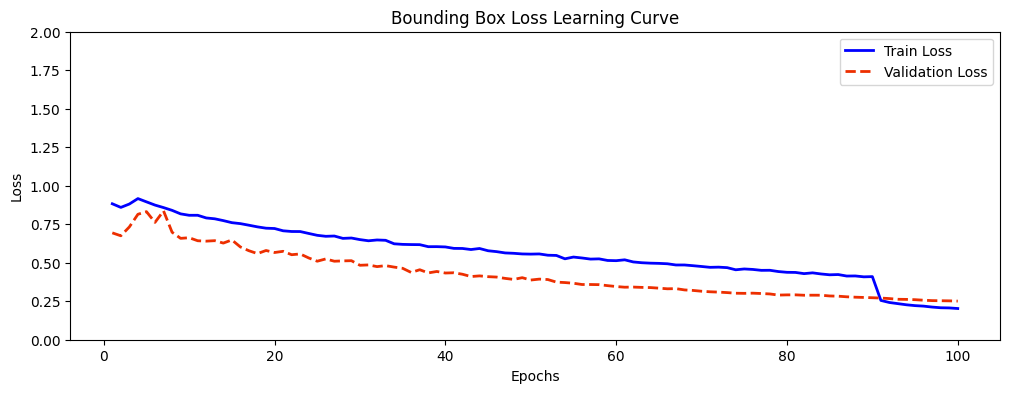

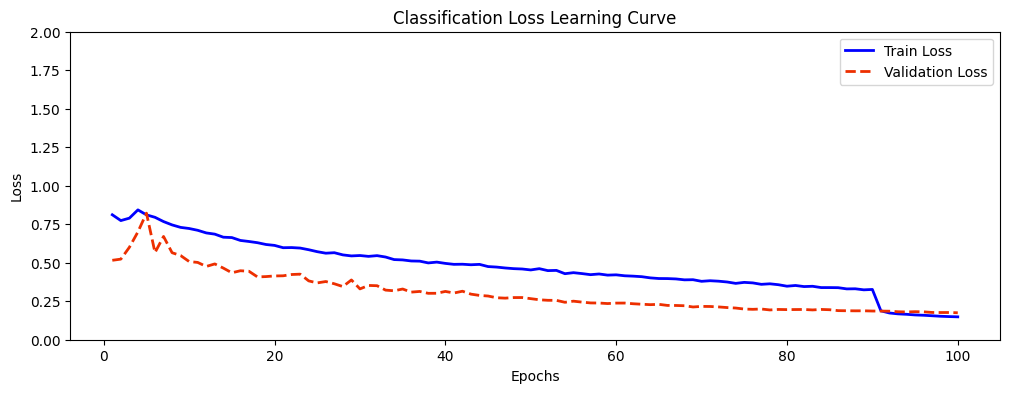

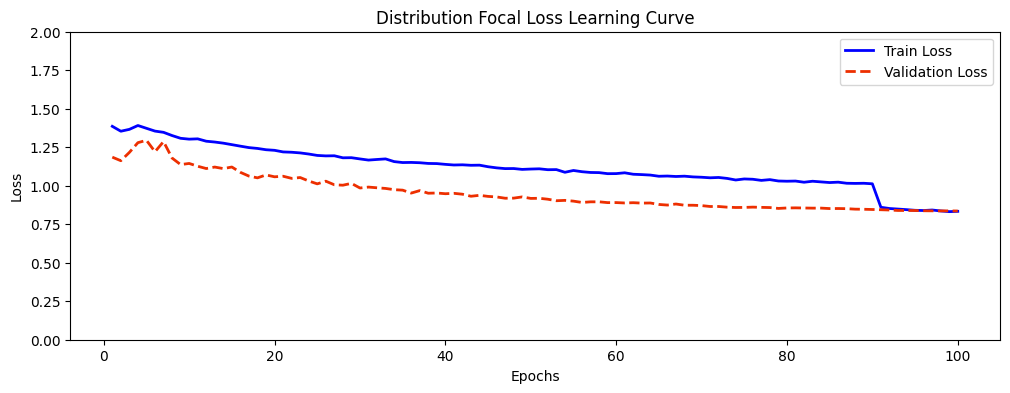

In [20]:
# Load the CSV file from the constructed path into a pandas DataFrame
df = pd.read_csv(yolov6_improved_result_csv)

# Remove any leading whitespace from the column names
df.columns = df.columns.str.strip()

# Plot the learning curves for each loss
plot_learning_curve(df, 'train/box_loss', 'val/box_loss', 'Bounding Box Loss Learning Curve')
plot_learning_curve(df, 'train/cls_loss', 'val/cls_loss', 'Classification Loss Learning Curve')
plot_learning_curve(df, 'train/dfl_loss', 'val/dfl_loss', 'Distribution Focal Loss Learning Curve')

### 5.2 Confidence Threshold (Improved)

In [22]:
confidence_metrics_paths_train2 = [
    f'{yolov6_improved_results_path}\\P_curve.png',
    f'{yolov6_improved_results_path}\\R_curve.png',
    f'{yolov6_improved_results_path}\\F1_curve.png'
]

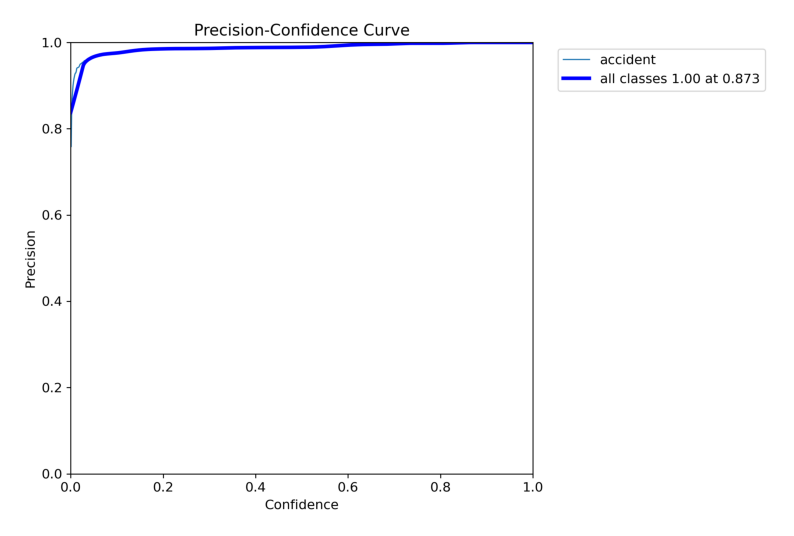

In [23]:
plt.figure(figsize=(10, 10))  # Adjust figsize as needed
img = plt.imread(confidence_metrics_paths_train2[0])
plt.imshow(img)
plt.axis('off')
plt.show()

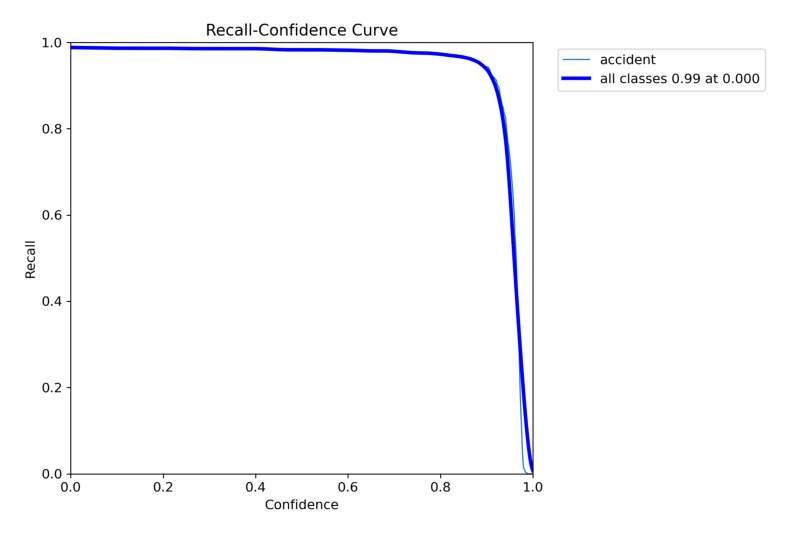

In [24]:
plt.figure(figsize=(10, 10))  # Adjust figsize as needed
img = plt.imread(confidence_metrics_paths_train2[1])
plt.imshow(img)
plt.axis('off')
plt.show()

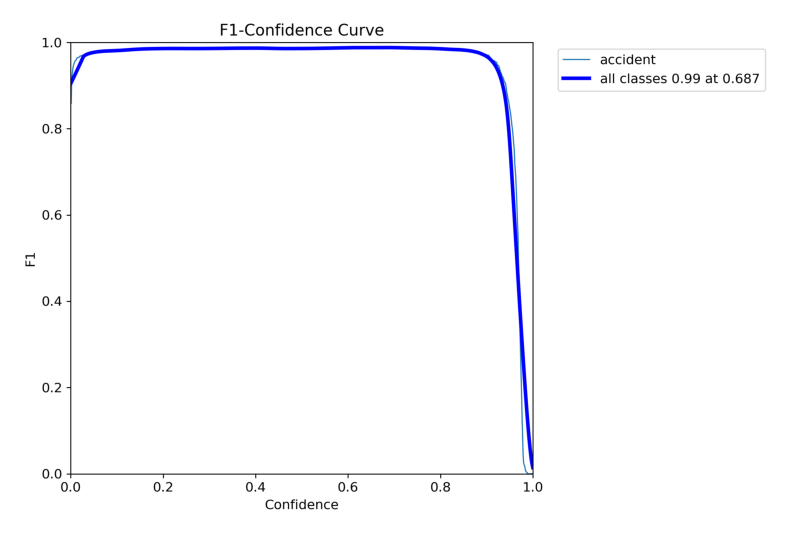

In [25]:
plt.figure(figsize=(10, 10))  # Adjust figsize as needed
img = plt.imread(confidence_metrics_paths_train2[2])
plt.imshow(img)
plt.axis('off')
plt.show()

### 5.3 Precision-Recall Curve (Improved)

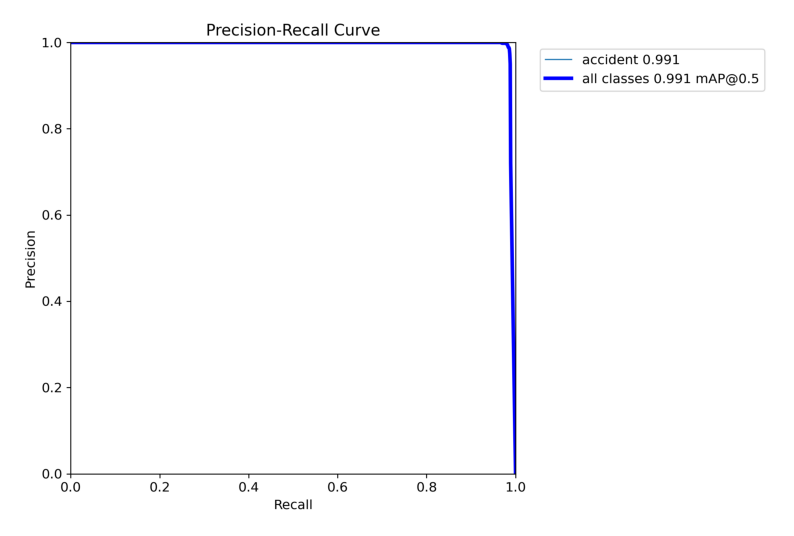

In [27]:
PR_Curve_img = f'{yolov6_improved_results_path}\\PR_curve.png'

plt.figure(figsize=(10, 10))  # Adjust figsize as needed
img = plt.imread(PR_Curve_img)
plt.imshow(img)
plt.axis('off')
plt.show()

### 5.4 Confusion Matrix (Improved) 

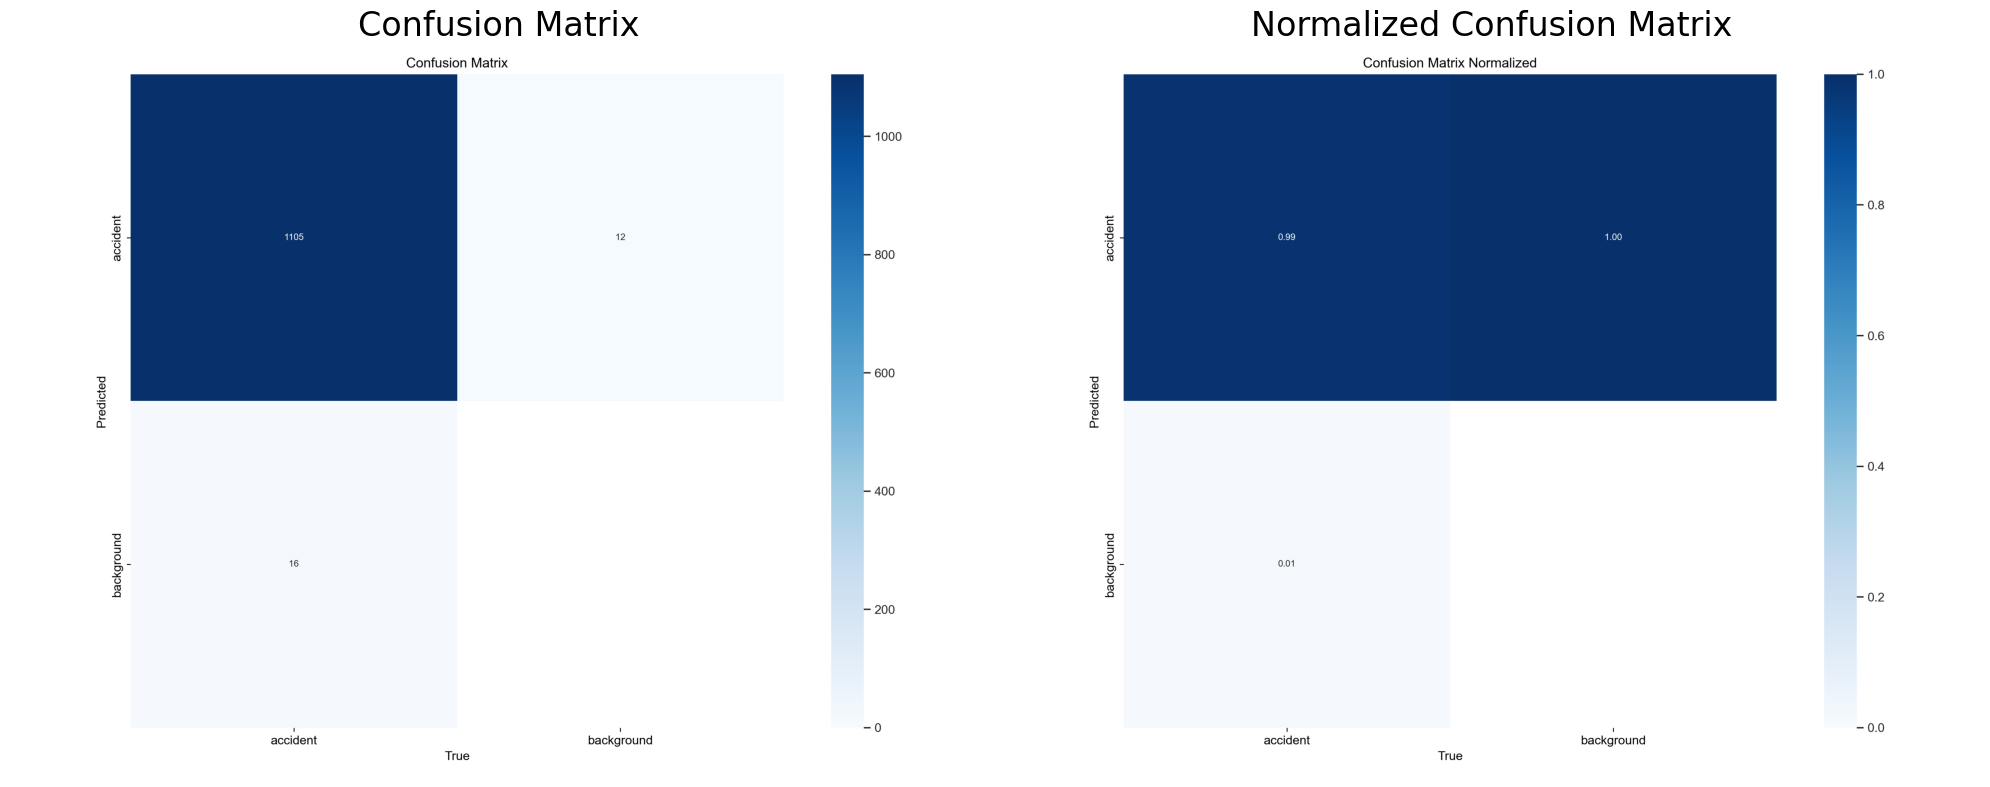

In [29]:
cf_matrix_nml_img = f'{yolov6_improved_results_path}\\confusion_matrix_normalized.png'
cf_matrix_img = f'{yolov6_improved_results_path}\\confusion_matrix.png'

# Read the images
cf_matrix_img_data = mpimg.imread(cf_matrix_img)
cf_matrix_nml_img_data = mpimg.imread(cf_matrix_nml_img)

# Create a 1x2 subplot
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Display the images
axs[0].imshow(cf_matrix_img_data)
axs[0].set_title('Confusion Matrix', fontsize=24)
axs[0].axis('off') 

axs[1].imshow(cf_matrix_nml_img_data)
axs[1].set_title('Normalized Confusion Matrix', fontsize=24)
axs[1].axis('off')

plt.tight_layout()
plt.show()

### 5.5 Validation Performance Metrics Assessment (Improved) 

In [6]:
yolov6_improved_model_weight = f'{yolov6_improved_results_path}\\weights\\best.pt'

yolov6_improved_model_load = YOLO(yolov6_improved_model_weight) 

In [32]:
yolov6_improved_val_result = yolov6_improved_model_load.val(project=project,name='train2_val')

Ultralytics YOLOv8.2.2  Python-3.10.14 torch-2.2.2 CUDA:0 (NVIDIA GeForce RTX 2070, 8192MiB)
YOLOv6n summary (fused): 142 layers, 4233843 parameters, 0 gradients, 11.8 GFLOPs


val: Scanning C:\Users\User\OneDrive - Asia Pacific University\APU\Year 3\FYP\Dataset\car_accident_dataset.v1i.yolov8\valid\labels.cache... 1072 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1072/1072 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:14<00:00,  4.61it/s]


                   all       1072       1121      0.996       0.98      0.991      0.968
Speed: 0.5ms preprocess, 3.6ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to v6n_model_building\train2_val


In [35]:
# Convert the dictionary to a pandas DataFrame and use the keys as the index
yolov6_improved_metrics_df = pd.DataFrame.from_dict(yolov6_improved_val_result.results_dict, orient='index', columns=['Metric Value'])

# Display the DataFrame
print(yolov6_improved_metrics_df.round(3))

                      Metric Value
metrics/precision(B)         0.996
metrics/recall(B)            0.980
metrics/mAP50(B)             0.991
metrics/mAP50-95(B)          0.968
fitness                      0.970


## Comparison Between YOLOv6 Baseline and Improved Models

### - Validation Result

In [36]:
merged_df = yolov6_baseline_metrics_df.merge(yolov6_improved_metrics_df, left_index=True, right_index=True, how='inner')
merged_df = merged_df.rename(columns={'Metric Value_x': 'Baseline Model', 'Metric Value_y': 'Improved Model'})
merged_df['Improvement'] = merged_df['Improved Model'] - merged_df['Baseline Model']

print(merged_df)

                      Baseline Model  Improved Model  Improvement
metrics/precision(B)        0.862178        0.995699     0.133521
metrics/recall(B)           0.818137        0.980375     0.162237
metrics/mAP50(B)            0.881204        0.991485     0.110281
metrics/mAP50-95(B)         0.600245        0.967890     0.367646
fitness                     0.628341        0.970250     0.341909


## 6. Model Inference

In [3]:
dataset1_path = 'C:\\Users\\User\\OneDrive - Asia Pacific University\\APU\\Year 3\\FYP\\Dataset\\AccidentsDetection_rbfdataset'
dataset2_path = 'C:\\Users\\User\\OneDrive - Asia Pacific University\\APU\\ear 3\\FYP\\Dataset\\car_accident_dataset.v1i.yolov8'

In [4]:
dataset1_test_images_path = f'{dataset1_path}\\test\\images'
dataset2_test_images_path = f'{dataset2_path}\\test\\images'


image 1/1 C:\Users\User\OneDrive - Asia Pacific University\APU\Year 3\FYP\Dataset\AccidentsDetection_rbfdataset\test\images\test_img_no_1.jpg: 640x640 1 accident, 8.0ms
Speed: 3.0ms preprocess, 8.0ms inference, 1292.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\User\OneDrive - Asia Pacific University\APU\Year 3\FYP\Dataset\AccidentsDetection_rbfdataset\test\images\test_img_no_158.jpg: 640x640 (no detections), 10.0ms
Speed: 3.0ms preprocess, 10.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\User\OneDrive - Asia Pacific University\APU\Year 3\FYP\Dataset\AccidentsDetection_rbfdataset\test\images\test_img_no_216.jpg: 640x640 1 accident, 11.0ms
Speed: 2.0ms preprocess, 11.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\User\OneDrive - Asia Pacific University\APU\Year 3\FYP\Dataset\AccidentsDetection_rbfdataset\test\images\test_img_no_275.jpg: 640x640 1 accident, 9.0ms
Speed: 3.0ms p

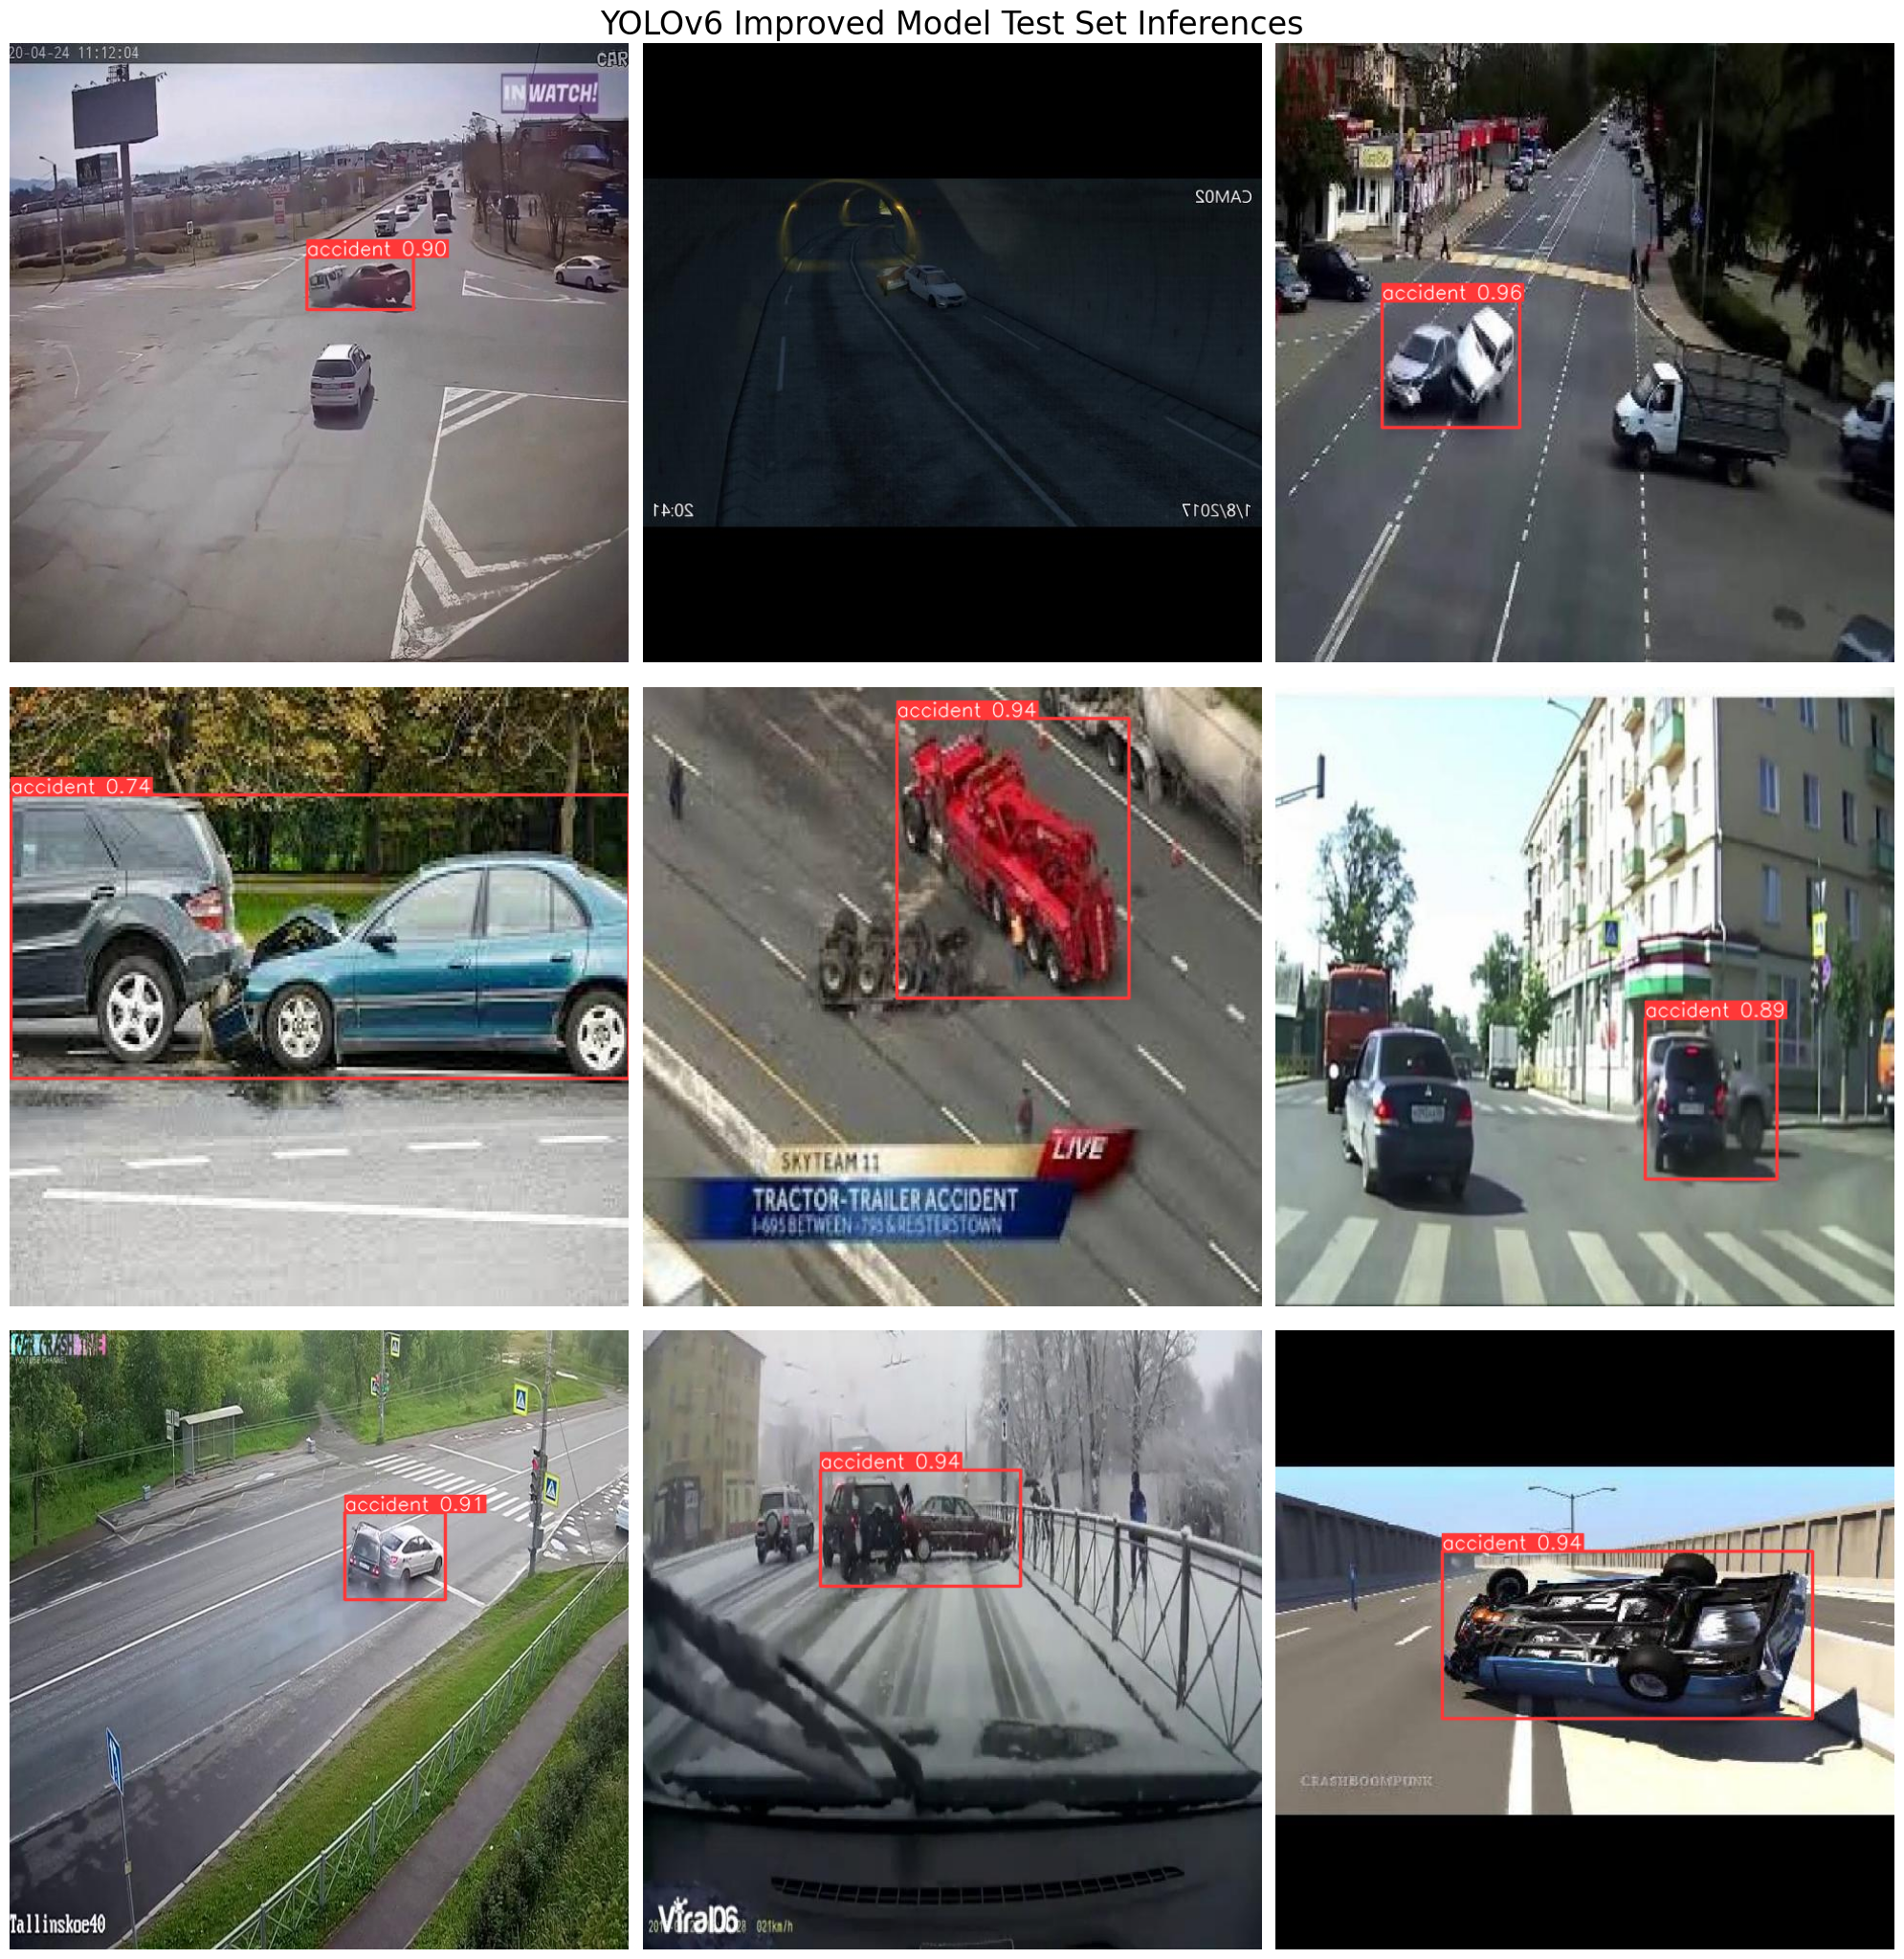

In [7]:
# List all jpg images in the directory
image_files = [file for file in os.listdir(dataset1_test_images_path) if file.endswith('.jpg')]

# Select 9 images at equal intervals
num_images = len(image_files)
selected_images = [image_files[i] for i in range(0, num_images, num_images // 9)]

# Initialize the subplot
fig, axes = plt.subplots(3, 3, figsize=(20, 21))
fig.suptitle('YOLOv6 Improved Model Test Set Inferences', fontsize=24)

# Perform inference on each selected image and display it
for i, ax in enumerate(axes.flatten()):
    image_path = os.path.join(dataset1_test_images_path, selected_images[i])
    results = yolov6_improved_model_load.predict(source=image_path, device=0)
    annotated_image = results[0].plot()
    annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
    ax.imshow(annotated_image_rgb)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [45]:
for image_file in os.listdir(dataset1_test_images_path):
    images_inference_speed_list = []
    image_path = os.path.join(dataset1_test_images_path,image_file)
    results = yolov6_improved_model_load.predict(source=image_path, device=0)
    for result in results:
        speed = result.speed
        speed_dict = dict(speed)
        images_inference_speed_list.append(speed_dict)

# Initialize variables to store total speeds
total_pre_process_speed = 0
total_inference_speed = 0
total_post_process_speed = 0

# Iterate through the list of dictionaries containing speeds
for speed_dict in images_inference_speed_list:
    # Add each speed value to the total
    total_pre_process_speed += speed_dict['preprocess']
    total_inference_speed += speed_dict['inference']
    total_post_process_speed += speed_dict['postprocess']

# Calculate the average speed for each type
num_images = len(images_inference_speed_list)
average_pre_process_speed = total_pre_process_speed / num_images
average_inference_speed = total_inference_speed / num_images
average_post_process_speed = total_post_process_speed / num_images

# Print the average speeds
print("Average Pre-processing Speed:", average_pre_process_speed)
print("Average Inference Speed:", average_inference_speed)
print("Average Post-processing Speed:", average_post_process_speed)


image 1/1 C:\Users\User\OneDrive - Asia Pacific University\APU\Year 3\FYP\Dataset\AccidentsDetection_rbfdataset\test\images\test_img_no_1.jpg: 640x640 1 accident, 57.8ms
Speed: 6.0ms preprocess, 57.8ms inference, 8.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\User\OneDrive - Asia Pacific University\APU\Year 3\FYP\Dataset\AccidentsDetection_rbfdataset\test\images\test_img_no_10.jpg: 640x640 1 accident, 57.8ms
Speed: 5.0ms preprocess, 57.8ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\User\OneDrive - Asia Pacific University\APU\Year 3\FYP\Dataset\AccidentsDetection_rbfdataset\test\images\test_img_no_100.jpg: 640x640 1 accident, 56.8ms
Speed: 5.0ms preprocess, 56.8ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\User\OneDrive - Asia Pacific University\APU\Year 3\FYP\Dataset\AccidentsDetection_rbfdataset\test\images\test_img_no_101.jpg: 640x640 1 accident, 8.0ms
Speed: 2.0ms preproce